# Étude de marché - Vin _(8 heures)_

Le client, le Domaine des Croix, cherche à se lancer sur le marché américain . Il souhaite donc **définir le prix** de ses bouteilles de vin **pour être compétitif sur le marché américain**. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix moyen en dollars de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de l'analyse du marché, et du prix que vous conseillez de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.




## Jeux de données
- Dataset des 130k vins : https://github.com/WildCodeSchool/wilddata/raw/main/wine.zip
- Dataset de la bouteille de vin que le client aimerait proposer sur le marché américain : https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix.csv



## EDA Dataset n°1

#### Chargement du dataset

In [ ]:
import pandas as pd

link = "https://github.com/WildCodeSchool/wilddata/raw/main/wine_df.zip"
df = pd.read_csv(link)

#### Info

In [ ]:
df.head(2)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2019 Vulkà Bianco (Etna),White Blend,Nicosia,2019.0
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2017.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
 13  year                   125331 non-null  float64
dtypes: float64(2), int64(1), object(11)


In [ ]:
df.shape

(129957, 14)

In [ ]:
df.dtypes.value_counts()

object     11
float64     2
int64       1
dtype: int64

In [ ]:
# Changer le type des colonnes object en category
df[df.select_dtypes(["object"]).columns] = df[df.select_dtypes(["object"]).columns].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   country                129894 non-null  category
 1   description            129957 non-null  category
 2   designation            92497 non-null   category
 3   points                 129957 non-null  int64   
 4   price                  120964 non-null  float64 
 5   province               129894 non-null  category
 6   region_1               108710 non-null  category
 7   region_2               50511 non-null   category
 8   taster_name            103713 non-null  category
 9   taster_twitter_handle  98744 non-null   category
 10  title                  129957 non-null  category
 11  variety                129956 non-null  category
 12  winery                 129957 non-null  category
 13  year                   125331 non-null  float64 
dtypes: category(11), flo

#### Valeurs uniques et value_counts

In [ ]:
# ANALYSE DU NOMBRE DE VALEURS UNIQUES PAR COLONNE

def nb_valeur_unique(df):
    for col in df.columns:
        nb_uniques = df[col].nunique()
        print(f'"{col}": {nb_uniques} valeur(s) unique(s)')

nb_valeur_unique(df)

"country": 43 valeur(s) unique(s)
"description": 119942 valeur(s) unique(s)
"designation": 37975 valeur(s) unique(s)
"points": 21 valeur(s) unique(s)
"price": 449 valeur(s) unique(s)
"province": 425 valeur(s) unique(s)
"region_1": 1228 valeur(s) unique(s)
"region_2": 17 valeur(s) unique(s)
"taster_name": 19 valeur(s) unique(s)
"taster_twitter_handle": 15 valeur(s) unique(s)
"title": 118827 valeur(s) unique(s)
"variety": 707 valeur(s) unique(s)
"winery": 16756 valeur(s) unique(s)
"year": 62 valeur(s) unique(s)


In [ ]:
# Afficher les différents testeurs
df['country'].unique()

['Italy', 'Portugal', 'US', 'Spain', 'France', ..., 'Ukraine', 'Slovakia', 'Macedonia', 'China', 'Egypt']
Length: 44
Categories (43, object): ['Argentina', 'Armenia', 'Australia', 'Austria', ..., 'Turkey', 'US', 'Ukraine',
                          'Uruguay']

In [ ]:
# Afficher la quantité de lignes par pays
df.country.value_counts()

US                        54504
France                    22079
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Macedoni

In [ ]:
# Afficher la quantité de lignes par pays en %
counts_country = df['country'].value_counts()
percentages_country = counts_country.div(counts_country.sum()) * 100
percentages_country[:10]

US           41.960368
France       16.997706
Italy        15.043035
Spain         5.115710
Portugal      4.381265
Chile         3.442807
Argentina     2.925462
Austria       2.575177
Australia     1.793000
Germany       1.666744
Name: country, dtype: float64

In [ ]:
# Afficher les différents testeurs
df['taster_name'].unique()

['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt', 'Alexander Peartree', 'Michael Schachner', ..., 'Jeff Jenssen', 'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams', 'Christina Pickard']
Length: 20
Categories (19, object): ['Alexander Peartree', 'Anna Lee C. Iijima', 'Anne Krebiehl MW', 'Carrie Dykes',
                          ..., 'Roger Voss', 'Sean P. Sullivan', 'Susan Kostrzewa',
                          'Virginie Boone']

In [ ]:
# Afficher la quantité de lignes par testeur
df.taster_name.value_counts()

Roger Voss            25500
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [ ]:
# Afficher la quantité de lignes par pays en %
counts_taster = df['taster_name'].value_counts()
percentages_taster = counts_taster.div(counts_taster.sum()) * 100
percentages_taster[:10]

Roger Voss            24.587082
Michael Schachner     14.592192
Kerin O’Keefe         10.390211
Virginie Boone         9.195569
Paul Gregutt           9.190748
Matt Kettmann          6.105310
Joe Czerwinski         4.962734
Sean P. Sullivan       4.788214
Anna Lee C. Iijima     4.256940
Jim Gordon             4.027460
Name: taster_name, dtype: float64

In [ ]:
# Afficher les différents user names des testeurs
df['taster_twitter_handle'].unique()

['@kerinokeefe', '@vossroger', '@paulgwine ', NaN, '@wineschach', ..., '@laurbuzz', '@worldwineguys', '@suskostrzewa', '@bkfiona', '@winewchristina']
Length: 16
Categories (15, object): ['@AnneInVino', '@JoeCz', '@bkfiona', '@gordone_cellars', ...,
                          '@wawinereport', '@wineschach', '@winewchristina', '@worldwineguys']

In [ ]:
# Afficher la quantité de lignes par user names des testeurs
df.taster_twitter_handle.value_counts()

@vossroger          25500
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

In [ ]:
# Afficher la quantité de lignes par année
df.year.value_counts()

2019.0    15863
2018.0    15736
2020.0    15562
2017.0    12545
2016.0    12169
          ...  
1971.0        1
1937.0        1
1949.0        1
1970.0        1
1947.0        1
Name: year, Length: 62, dtype: int64

In [ ]:
# Afficher la quantité de lignes par année
counts_year = df['year'].value_counts()
counts_year_quantites = counts_year.sort_index()
counts_year_quantites.tail(40)

1980.0        1
1982.0        1
1984.0        2
1986.0        2
1988.0        1
1989.0        2
1990.0        2
1991.0        4
1992.0        4
1993.0        2
1994.0        5
1995.0        6
1996.0        5
1997.0        4
1998.0       16
1999.0        4
2000.0       23
2001.0       49
2002.0       68
2003.0      303
2004.0      550
2005.0      641
2006.0      759
2007.0      692
2008.0      367
2009.0      598
2010.0     1772
2011.0     3621
2012.0     5782
2013.0     7050
2014.0     7440
2015.0     9876
2016.0    12169
2017.0    12545
2018.0    15736
2019.0    15863
2020.0    15562
2021.0    10041
2022.0     3690
2023.0       11
Name: year, dtype: int64

In [ ]:
# Afficher la quantité de lignes par année en %
percentages_year = counts_year.div(counts_year.sum()) * 100
percentages_year = percentages_year.sort_index()
percentages_year.tail(20)

2004.0     0.438838
2005.0     0.511446
2006.0     0.605596
2007.0     0.552138
2008.0     0.292825
2009.0     0.477137
2010.0     1.413856
2011.0     2.889150
2012.0     4.613384
2013.0     5.625105
2014.0     5.936281
2015.0     7.879934
2016.0     9.709489
2017.0    10.009495
2018.0    12.555553
2019.0    12.656885
2020.0    12.416721
2021.0     8.011585
2022.0     2.944204
2023.0     0.008777
Name: year, dtype: float64

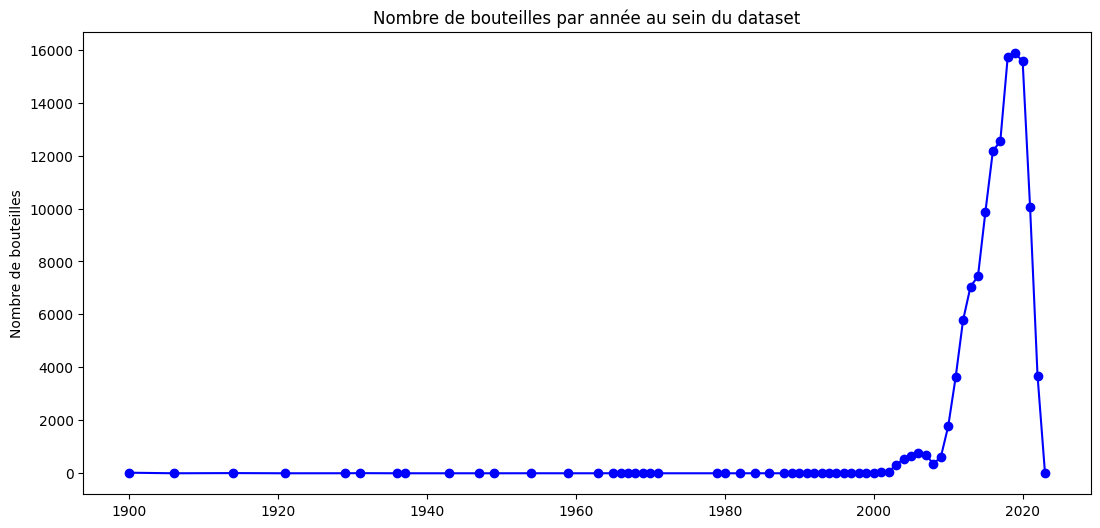

In [ ]:
# Créer un graphique qui montre l'évolution du nombre de bouteilles par année
plt.figure(figsize=(13, 6))
plt.plot(counts_year_quantites.index, counts_year_quantites.values, marker='o', linestyle='-', color='b')
plt.ylabel('Nombre de bouteilles')
plt.title('Nombre de bouteilles par année au sein du dataset')
plt.show()

#### Valeurs manquantes

In [ ]:
# Identifier le nombre de Nan total au sein du DF
df.isna().sum().sum()

209356

In [ ]:
# Identifier le nombre de Nan par colonnes : en nombre de lignes
df.isna().sum()

country                     63
description                  0
designation              37460
points                       0
price                     8993
province                    63
region_1                 21247
region_2                 79446
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
year                      4626
dtype: int64

In [ ]:
# Identifier le taux de remplissage : en %

def taux_remplissage(df):
    taux_de_remplissage = (df.count() / len(df)) *100
    taux_de_remplissage = round(taux_de_remplissage,2)
    return (taux_de_remplissage)
taux_remplissage(df)

country                   99.95
description              100.00
designation               71.18
points                   100.00
price                     93.08
province                  99.95
region_1                  83.65
region_2                  38.87
taster_name               79.81
taster_twitter_handle     75.98
title                    100.00
variety                  100.00
winery                   100.00
year                      96.44
dtype: float64

In [ ]:
df_sans_prix = df[df['price'].isna()]
df_sans_prix['winery'].value_counts()

# Je décide de supprimer les lignes sans prix

Georges Duboeuf       76
Albert Bichot         60
Henri de Villamont    58
Maison Champy         34
Dão Sul               30
                      ..
Donkey & Goat          0
Donna Anita            0
Donna Laura            0
Donne Fittipaldi       0
Štoka                  0
Name: winery, Length: 16756, dtype: int64

#### Analyse des données numériques

In [ ]:
# Analyser les données statistiques des colonnes price et points
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
points,129957.0,88.446655,3.039481,80.0,86.0,88.0,91.0,100.0
price,120964.0,36.390827,32.802430,2.0,21.0,29.0,42.0,1902.0
year,125331.0,2016.646560,4.135618,1900.0,2015.0,2017.0,2019.0,2023.0


- Les notations sont assez bien réparties entre 80 et 91 avec une moyenne à 88.
- Il y a en revanche un énorme gap entre le prix des bouteilles allant de 2 à 1902 dollards. La moyenne est de 36 dollars, proche du Q3 tirée par le haut par les bouteilles vendues très chères.

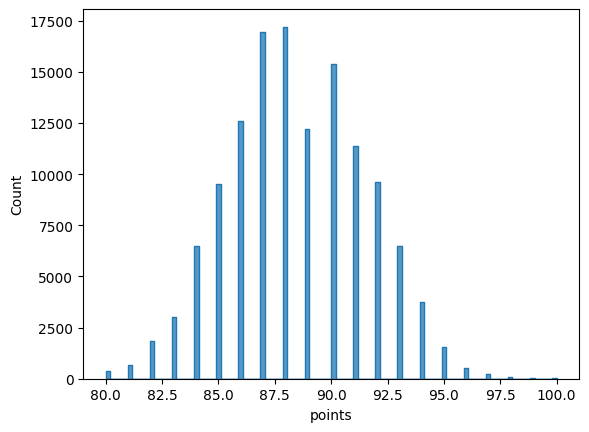

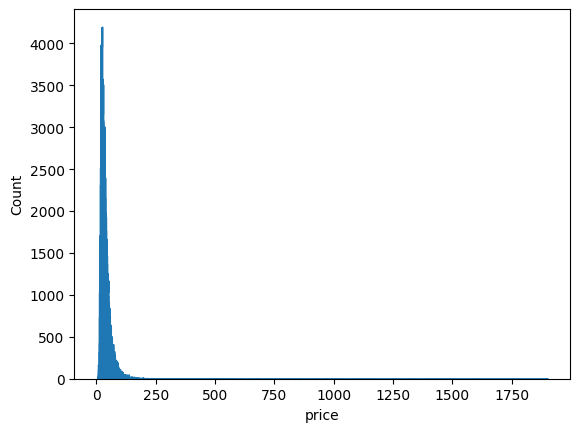

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Observation de la distribution des notations (points)
sns.histplot(data=df, x=df['points'],element="step")
plt.show()

# Observation de la distribution des prix de vente (price)
sns.histplot(data=df, x=df['price'],element="step")
plt.show()

In [ ]:
# calculate correlation
corr = df.corr()
corr

<ipython-input-303-b93584a9cd10>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,points,price,year
points,1.000000,0.473508,0.044723
price,0.473508,1.000000,-0.309358
year,0.044723,-0.309358,1.000000


Pas de forte corréalation entre le prix des bouteilles et la notation.

#### Analyse des données categorielles

In [ ]:
# Afficher les colonnes de type category
df.select_dtypes(include='category').columns

Index(['country', 'description', 'designation', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

In [ ]:
# Afficher la répartition du prix par pays
import plotly.express as px
px.box(
    data_frame=df,
    x='price',
    y='country',
    color='country',
    height=600
)

## EDA Dataset n°2

In [ ]:
bouteille_df = pd.read_csv("https://raw.githubusercontent.com/WildCodeSchool/wilddata/main/domaine_des_croix_df.csv")

#### Info

In [ ]:
bouteille_df

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,France,"Firm and solid with great swathes of black fruits as well as dense tannins. Ripe fruits are a major element of this concentrated wine. The wine has power and a firm tannic core, and certainly needs aging for seven years.",NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix,2016


In [ ]:
bouteille_df.shape

(1, 14)

In [ ]:
# Ne pas mettre de limite à la largeur maximale de la colonne (None)
pd.set_option('display.max_colwidth', None)
print(bouteille_df['description'])

0    Firm and solid with great swathes of black fruits as well as dense tannins. Ripe fruits are a major element of this concentrated wine. The wine has power and a firm tannic core, and certainly needs aging for seven years.
Name: description, dtype: object


### Construction CSV pour POWER BI

In [ ]:
# Garder uniquement les bouteilles produites après 2010
df_power_bi = df[df['year'] >= 2010]

# Supprimer les bouteilles qui ne sont pas positionnées sur le marché américain ou le prix n'est juste pas renseigné
df_power_bi = df_power_bi.dropna(subset=["price"])

# Supprimer les bouteilles où le pays, l'année, le cépage ne sont pas renseignés
df_power_bi = df_power_bi.dropna(subset=['year', 'winery', 'country'])

In [ ]:
# Changer le type de la colonne date en int vs float
#df_power_bi['year'] = df_power_bi['year'].astype(int)

In [ ]:
# Conversion de la colonne 'année' en format datetime avec juste l'année
df_power_bi['year'] = pd.to_datetime(df_power_bi['year'], format='%Y').dt.year

In [ ]:
df_power_bi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112822 entries, 1 to 129956
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   country                112822 non-null  category
 1   description            112822 non-null  category
 2   designation            79655 non-null   category
 3   points                 112822 non-null  int64   
 4   price                  112822 non-null  float64 
 5   province               112822 non-null  category
 6   region_1               94430 non-null   category
 7   region_2               47989 non-null   category
 8   taster_name            91239 non-null   category
 9   taster_twitter_handle  86441 non-null   category
 10  title                  112822 non-null  category
 11  variety                112822 non-null  category
 12  winery                 112822 non-null  category
 13  year                   112822 non-null  int64   
dtypes: category(11), flo

In [ ]:
df_power_bi.shape

(112822, 14)

In [ ]:
df_power_bi.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,20.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2017 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2017
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,18.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2019 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2019
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,18.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2019 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,2019
4,US,"Much like the regular bottling from 2016, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,44.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2018 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,2018
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,20.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2017 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem,2017


### Nuage de mots : NLP

##### Processing

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import string

nltk.download('stopwords')
nltk.download('punkt')

def func_clean(text):
    '''
    La fonction func_clean prend un texte en anglais en paramètre
    et retourne le texte nettoyé de sa ponctuation et des stop_words.
    '''
    # Convert the text to lowercase
    text = text.lower()

    # Tokenize the text into individual words
    tokens = word_tokenize(text)

    # Remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    tokens = [word.translate(table) for word in tokens]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


##### Dataset n°1

In [ ]:
# j'applique la fonction cleaned text et je la stocker dans une nouvelle colonne du DF
df_power_bi['description_clean'] = df_power_bi['description'].apply(func_clean)

###### Total vin

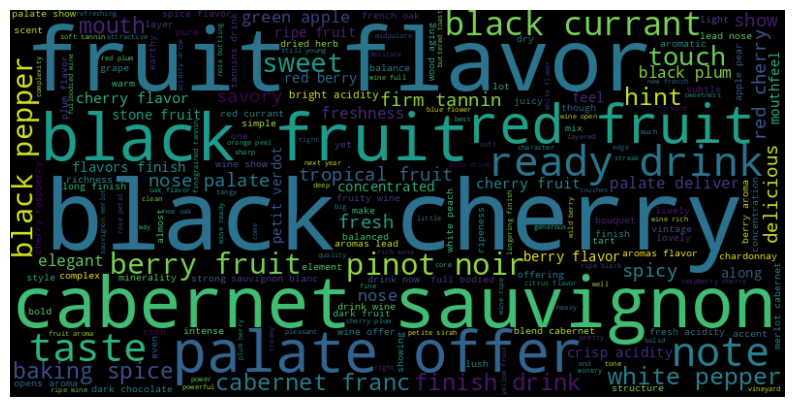

In [ ]:
# Je crée un nuage de mots à partir de la colonne description : SUR L'ENSEMBLE DU DF

# Concaténer tous les textes de la colonne 'description' en une seule chaîne
text_clean = " ".join(description for description in df_power_bi['description_clean'])

# Créer un objet WordCloud
wordcloud = WordCloud(width=800, height=400, max_font_size=100, colormap='viridis').generate(text_clean)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Supprimer les axes du graphique
plt.show()

###### Pinot Noir

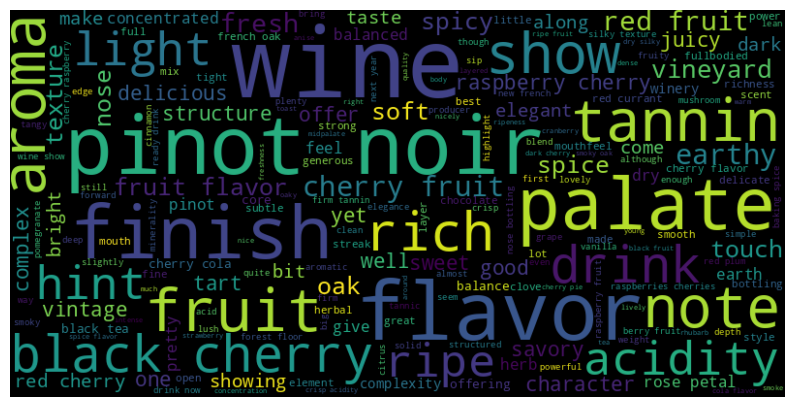

In [ ]:
# Je crée un nuage de mots à partir de la colonne description : SUR LE PINOT NOIR UNIQUEMENT

# Je crée un df avec uniquement les vins de Bourgogne
df_pinot_noir = df_power_bi[df_power_bi['variety'] == 'Pinot Noir']

# Concaténer tous les textes de la colonne 'description' en une seule chaîne
text_clean_pinot_noir = " ".join(description for description in df_pinot_noir['description_clean'])

# Créer un objet WordCloud
wordcloud_pinot_noir = WordCloud(width=800, height=400, max_font_size=100, colormap='viridis').generate(text_clean_pinot_noir)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_pinot_noir, interpolation='bilinear')
plt.axis('off')
plt.show()

###### Vin de Bourgogne

In [ ]:
df_power_bi['variety'].value_counts()[:100]

Pinot Noir                  12338
Chardonnay                  10314
Cabernet Sauvignon           8943
Red Blend                    8033
Bordeaux-style Red Blend     5187
                            ...  
Rosado                         75
St. Laurent                    75
Ribolla Gialla                 74
Negroamaro                     70
Falanghina                     70
Name: variety, Length: 100, dtype: int64

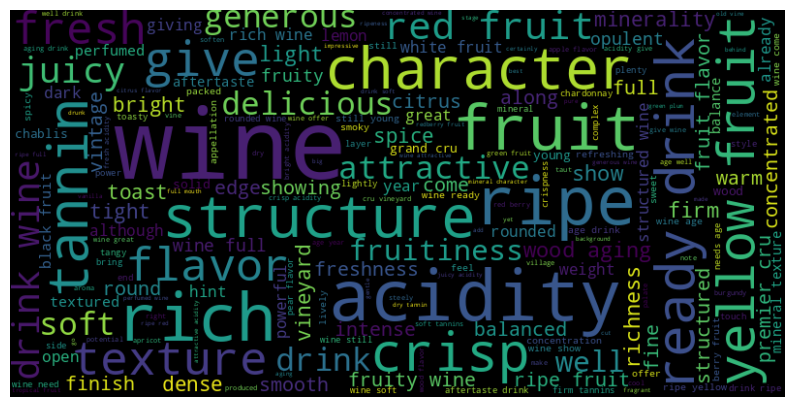

In [ ]:
# Je crée un nuage de mots à partir de la colonne description : SUR LE VIN DE LA PROVINCE BURGUNDY = BOURGOGNE

# Je crée un df avec uniquement les vins de Bourgogne
df_bourgogne = df_power_bi[df_power_bi['province'] == 'Burgundy']

# Concaténer tous les textes de la colonne 'description' en une seule chaîne
text_clean_bourgogne = " ".join(description for description in df_bourgogne['description_clean'])

# Créer un objet WordCloud
wordcloud_bourgogne = WordCloud(width=800, height=400, max_font_size=100, colormap='viridis').generate(text_clean_bourgogne)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_bourgogne, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
df_bourgogne['variety'].value_counts()[:20]

Chardonnay               1762
Pinot Noir               1175
Aligoté                    19
Sauvignon Blanc            12
Gamay                      11
Pinot Noir-Gamay           10
Champagne Blend             9
Rosé                        5
White Blend                 2
Red Blend                   1
Pinot Blanc                 1
Sacy                        1
Colombard-Ugni Blanc        1
Sparkling Blend             1
Chardonnay-Pinot Gris       1
Auxerrois                   1
Refosco                     0
Rebula                      0
Rebo                        0
Abouriou                    0
Name: variety, dtype: int64

###### Vin de Bourgogne rouges

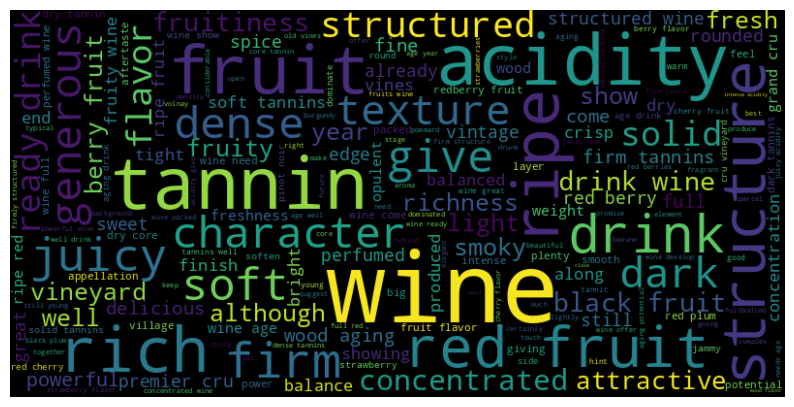

In [ ]:
# Je crée un nuage de mots à partir de la colonne description : SUR LE VIN DE LA PROVINCE BURGUNDI ROUGE UNIQUEMENT

# Je crée un df avec uniquement les vins de Bourgogne
df_bourgogne_rouge = df_bourgogne[(df_bourgogne['variety'] == 'Pinot Noir') | (df_bourgogne['variety'] == 'Gamay') | (df_bourgogne['variety'] == 'Pinot Noir-Gamay')]

# Concaténer tous les textes de la colonne 'description' en une seule chaîne
text_clean_bourgogne_rouge = " ".join(description for description in df_bourgogne_rouge['description_clean'])

# Créer un objet WordCloud
wordcloud_bourgogne_rouge = WordCloud(width=800, height=400, max_font_size=100, colormap='viridis').generate(text_clean_bourgogne_rouge)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_bourgogne_rouge, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Dataset n°2

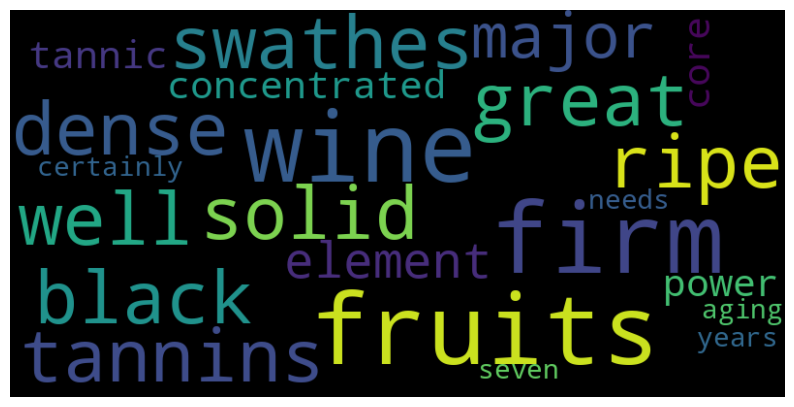

In [ ]:
# j'applique la fonction cleaned text et je la stocker dans une nouvelle colonne du DF
bouteille_df['description_clean'] = bouteille_df['description'].apply(func_clean)

# Créer un nuage de mots à partir de la colonne description : APRES PROCESSING

# Concaténer tous les textes de la colonne 'description' en une seule chaîne
text_clean_2 = " ".join(description for description in bouteille_df['description_clean'])

# Créer un objet WordCloud
wordcloud_df2 = WordCloud(width=800, height=400, max_font_size=100, colormap='viridis').generate(text_clean_2)

# Afficher le nuage de mots
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_df2, interpolation='bilinear')
plt.axis('off')  # Supprimer les axes du graphique
plt.show()

## Recommandation de prix premium

In [ ]:
df_bourgogne = df_power_bi[df_power_bi['province'] == 'Burgundy']

df_bourgogne_rouge = df_bourgogne[(df_bourgogne['variety'] == 'Pinot Noir') | (df_bourgogne['variety'] == 'Gamay') | (df_bourgogne['variety'] == 'Pinot Noir-Gamay')]

df_bourgogne_rouge_2016 = df_bourgogne_rouge[(df_bourgogne_rouge['year'] == 2016) ]


In [ ]:
df_bourgogne_rouge_2016['price'].describe()

count     138.000000
mean       74.123188
std       140.783545
min        16.000000
25%        32.000000
50%        48.500000
75%        68.500000
max      1590.000000
Name: price, dtype: float64

In [ ]:
# Afficher la répartition du prix par pays
import plotly.express as px

fig = px.box(
    data_frame=df_bourgogne_rouge_2016,
    x='price',
    y='country',
    color='country',
    height=600
)

fig.update_xaxes(range=[0, 500])
fig.show()


## Export du fichier csv Power BI

In [ ]:
# Exporter le df en fichier csv depuis google colab
df_power_bi.to_csv('df_power_bi.csv')
from google.colab import files
files.download("df_power_bi.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>